<a href="https://colab.research.google.com/github/nayaniikaa/My_frist_project/blob/main/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 1**

In [ ]:
num1 = input("Enter first number:")
num2 = input("Enter second number:")
sum = float(num1) + float(num2)
print('The sum of {0} and {1} is {2}'.format(num1,num2,sum))


Enter first number:1.5
Enter second number:6.3
The sum of 1.5 and 6.3 is 7.8


In [ ]:
import random
number = random.randint(1,100)
guess = 0
while guess != number:
  guess = int(input("Enter Guess: "))
  if (guess < number):
    print("Guess higher!")
  elif (guess > number):
      print("Guess lower!")

  else:
        print("You won!")


Enter Guess: 25
Guess higher!
Enter Guess: 50
Guess higher!
Enter Guess: 75
Guess lower!
Enter Guess: 65
Guess lower!
Enter Guess: 60
Guess lower!
Enter Guess: 55
You won!


# **Experiment 2**

In [ ]:
class VacuumCleaner1x2:
    def __init__(self, dirty_positions=[(0, 0), (1, 0)]):
        self.x = 0  # Start at left tile (0,0)
        self.y = 0
        self.room_width = 2
        self.room = [['C' for _ in range(self.room_width)]]
        for (dx, dy) in dirty_positions:
            if 0 <= dx < self.room_width and dy == 0:
                self.room[dy][dx] = 'D'
        print("Vacuum Cleaner initialized at position (0, 0)")
        self.display_room()
        self.clean_tile()

    def move(self, direction):
        if direction == 'RIGHT' and self.x < self.room_width - 1:
            self.x += 1
        elif direction == 'LEFT' and self.x > 0:
            self.x -= 1
        else:
            print("Invalid move or boundary reached.")
            return
        print(f"\nMoved {direction} to ({self.x}, {self.y})")
        self.clean_tile()

    def clean_tile(self):
        if self.room[self.y][self.x] == 'D':
            self.room[self.y][self.x] = 'C'
            print(f"Cleaned tile at ({self.x}, {self.y})")
        else:
            print(f"Tile at ({self.x}, {self.y}) is already clean.")
        self.display_room()

    def display_room(self):
        print("\nRoom status (C = Clean, D = Dirty):")
        row = ""
        for col in range(self.room_width):
            if self.x == col:
                row += f"V({self.room[0][col]}) "
            else:
                row += f" {self.room[0][col]} "
        print(row + "\n")


if __name__ == "__main__":
    cleaner = VacuumCleaner1x2(dirty_positions=[(0, 0), (1, 0)])
    commands = ['RIGHT', 'LEFT']
    for cmd in commands:
        cleaner.move(cmd)


Vacuum Cleaner initialized at position (0, 0)

Room status (C = Clean, D = Dirty):
V(D)  D 

Cleaned tile at (0, 0)

Room status (C = Clean, D = Dirty):
V(C)  D 


Moved RIGHT to (1, 0)
Cleaned tile at (1, 0)

Room status (C = Clean, D = Dirty):
 C V(C) 


Moved LEFT to (0, 0)
Tile at (0, 0) is already clean.

Room status (C = Clean, D = Dirty):
V(C)  C 



# **Experiment 3**

In [ ]:
from collections import deque

# Define all locations
locations = ['A', 'B', 'C']  # 'A': Initial position of the monkey; 'B': Initial position of the box

# Define the goal state
GOAL = ('C', 'C', True, True)  # Monkey and box at C, monkey on box, has banana

# Define possible actions
def get_possible_actions(state):
    monkey, box, on_box, has_banana = state
    actions = []

    if has_banana:
        return []  # Goal reached, no more actions needed

    # Walk to other locations
    for loc in locations:
        if loc != monkey:
            actions.append(('walk', loc))

    # Push box if at same location and not on box
    if monkey == box and not on_box:
        for loc in locations:
            if loc != monkey:
                actions.append(('push', loc))

    # Climb up/down
    if monkey == box:
        if not on_box:
            actions.append(('climb_up',))
        else:
            actions.append(('climb_down',))

    # Grab banana if under it and on the box
    if monkey == 'C' and box == 'C' and on_box:
        actions.append(('grab',))

    return actions

# Apply action and return new state
def apply_action(state, action):
    monkey, box, on_box, has_banana = state

    if action[0] == 'walk':
        return (action[1], box, False, has_banana)  # Walking causes monkey to climb down if on box

    elif action[0] == 'push':
        return (action[1], action[1], False, has_banana)  # Monkey and box move together

    elif action[0] == 'climb_up':
        return (monkey, box, True, has_banana)

    elif action[0] == 'climb_down':
        return (monkey, box, False, has_banana)

    elif action[0] == 'grab':
        return (monkey, box, on_box, True)

    return state

# BFS to find path to goal
def solve():
    start = ('A', 'B', False, False)  # monkey_position, box_position, monkey_on_box, has_banana
    queue = deque()
    queue.append((start, []))
    visited = set()

    while queue:
        current_state, path = queue.popleft()

        if current_state == GOAL:
            return path + [("Goal Reached!",)]

        if current_state in visited:
            continue
        visited.add(current_state)

        for action in get_possible_actions(current_state):
            new_state = apply_action(current_state, action)
            if new_state not in visited:
                queue.append((new_state, path + [action]))

    return None

# Run the solver
solution = solve()

# Print the solution path
if solution:
    for step in solution:
        print(step)



('walk', 'B')
('push', 'C')
('climb_up',)
('grab',)
('Goal Reached!',)


# **Experiment 4**

In [ ]:
a = int(input("Enter Jug A Capacity: "))
b = int(input("Enter Jug B Capacity: "))
ai = int(input("Initially Water in Jug A: "))
bi = int(input("Initially Water in Jug B: "))
af = int(input("Final State of Jug A: "))
bf = int(input("Final State of Jug B: "))

print("List Of Operations You can Do:\n")
print("1.Fill Jug A Completely\n")
print("2.Fill Jug B Completely\n")
print("3.Empty Jug A Completely\n")
print("4.Empty Jug B Completely\n")
print("5.Pour From Jug A till Jug B filled Completely or A becomes empty\n")
print("6.Pour From Jug B till Jug A filled Completely or B becomes empty\n")
print("7.Pour all From Jug B to Jug A\n")
print("8.Pour all From Jug A to Jug B\n")

while ((ai != af or bi != bf)):
    op = int(input("Enter the Operation: "))
    if (op == 1):
        ai = a
    elif (op == 2):
        bi = b
    elif (op == 3):
        ai = 0
    elif (op == 4):
        bi = 0
    elif (op == 5):
        if (b - bi > ai):
            bi = ai + bi
            ai = 0
        else:
            ai = ai - (b - bi)
            bi = b
    elif (op == 6):
        if (a - ai > bi):
            ai = ai + bi
            bi = 0
        else:
            bi = bi - (a - ai)
            ai = a
    elif (op == 7):
        ai = ai + bi
        bi = 0
    elif (op == 8):
        bi = bi + ai
        ai = 0
    print(ai, bi)


Enter Jug A Capacity: 4
Enter Jug B Capacity: 3
Initially Water in Jug A: 0
Initially Water in Jug B: 0
Final State of Jug A: 2
Final State of Jug B: 0
List Of Operations You can Do:

1.Fill Jug A Completely

2.Fill Jug B Completely

3.Empty Jug A Completely

4.Empty Jug B Completely

5.Pour From Jug A till Jug B filled Completely or A becomes empty

6.Pour From Jug B till Jug A filled Completely or B becomes empty

7.Pour all From Jug B to Jug A

8.Pour all From Jug A to Jug B

Enter the Operation: 2
0 3
Enter the Operation: 6
3 0
Enter the Operation: 2
3 3
Enter the Operation: 6
4 2
Enter the Operation: 3
0 2
Enter the Operation: 6
2 0


#**Experiment 5**

In [ ]:
class Node:
    def __init__(self, data, level, fval):
        # Initialize the node with the data, level of the node, and the calculated fvalue
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        # Generate child nodes from the given node by moving the blank space
        # either in the four directions: {up, down, left, right}
        x, y = self.find(self.data, '_')
        # val_list contains position values for moving the blank space in either of
        # the 4 directions [up, down, left, right] respectively.
        val_list = [[x, y - 1], [x, y + 1], [x - 1, y], [x + 1, y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data, x, y, i[0], i[1])
            if child is not None:
                child_node = Node(child, self.level + 1, 0)
                children.append(child_node)
        return children

    def shuffle(self, puz, x1, y1, x2, y2):
        # Move the blank space in the given direction and if the position values are out
        # of limits, then return None
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None

    def copy(self, root):
        # Copy function to create a similar matrix of the given node
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp

    def find(self, puz, x):
        # Specifically used to find the position of the blank space
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data)):
                if puz[i][j] == x:
                    return i, j

class Puzzle:
    def __init__(self, size):
        # Initialize the puzzle size by the specified size, open and closed lists to empty
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        # Accepts the puzzle from the user
        puz = []
        for i in range(0, self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self, start, goal):
        # Heuristic function to calculate Heuristic value f(x) = h(x) + g(x)
        return self.h(start.data, goal) + start.level

    def h(self, start, goal):
        # Calculates the difference between the given puzzles
        temp = 0
        for i in range(0, self.n):
            for j in range(0, self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp

    def process(self):
        # Accept Start and Goal Puzzle state
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")
        goal = self.accept()
        start = Node(start, 0, 0)
        start.fval = self.f(start, goal)
        # Put the start node in the open list
        self.open.append(start)
        print("\n\n")

        while True:
            cur = self.open[0]
            print("==================================================\n")
            for i in cur.data:
                for j in i:
                    print(j, end=" ")
                print("")
            # If the difference between the current and goal node is 0, we have reached the goal node
            if (self.h(cur.data, goal) == 0):
                break

            for i in cur.generate_child():
                i.fval = self.f(i, goal)
                self.open.append(i)

            self.closed.append(cur)
            del self.open[0]
            # Sort the open list based on f value
            self.open.sort(key=lambda x: x.fval, reverse=False)

puz = Puzzle(3)
puz.process()


Enter the start state matrix 

1 2 3
5 6 _
7 8 4
Enter the goal state matrix 

1 2 3 
5 8 6
7 _ 4




1 2 3 
5 6 _ 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 


# **Experiment 6**

In [ ]:
from collections import deque
def bfs_shortest_path(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        current_node, path = queue.popleft()

        if current_node == goal:
            return path

        visited.add(current_node)

        for neighbor in graph.get(current_node, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                visited.add(neighbor)
    return None
graph = {}
n = int(input("Enter number of edges in the unweighted graph: "))
print("Enter edges (format: A B means edge between A and B):")
for _ in range(n):
    u, v = input().split()
    graph.setdefault(u, []).append(v)
    graph.setdefault(v, []).append(u)  # undirected graph
start = input("Enter start node: ")
goal = input("Enter goal node: ")
path = bfs_shortest_path(graph, start, goal)
if path:
    print("Shortest path using BFS:", ' -> '.join(path))
else:
    print("No path found.")

Enter number of edges in the unweighted graph: 5
Enter edges (format: A B means edge between A and B):
A B
C D
B C
D E
A E
Enter start node: A
Enter goal node: D
Shortest path using BFS: A -> E -> D


# **Experiment 7**

In [ ]:
from sympy import symbols
from sympy.logic.boolalg import And, Or, Not
from pyDatalog import pyDatalog

P, Q = symbols('P Q')
expr = And(P, Q)

print(expr.subs({P: True, Q: True}))
print(expr.subs({P: True, Q: False}))

pyDatalog.create_terms('parent, X')

+ parent('Alice', 'Bob')

print(parent('Alice', X))


True
False
X  
---
Bob


# **Experiment 8**

In [ ]:
import random
from collections import Counter
someWords = '''apple banana mango strawberry
orange grape pineapple apricot lemon coconut watermelon
cherry papaya berry peach lychee muskmelon'''
someWords = someWords.split(' ')
word = random.choice(someWords)
if __name__ == '__main__':
    print('Guess the word! HINT: word is a name of a fruit')
    for i in word:
        print('_', end=' ')
    print()
    playing = True
    letterGuessed = ''
    chances = len(word) + 2
    correct = 0
    flag = 0
    try:
        while (chances != 0) and flag == 0:
            print()
            chances -= 1
            try:
                guess = str(input('Enter a letter to guess: '))
            except:
                print('Enter only a letter!')
                continue
            if not guess.isalpha():
                print('Enter only a LETTER')
                continue
            elif len(guess) > 1:
                print('Enter only a SINGLE letter')
                continue
            elif guess in letterGuessed:
                print('You have already guessed that letter')
                continue
            if guess in word:
                k = word.count(guess)
                for _ in range(k):
                    letterGuessed += guess
            for char in word:
                if char in letterGuessed and (Counter(letterGuessed) != Counter(word)):
                    print(char, end=' ')
                    correct += 1
                elif (Counter(letterGuessed) == Counter(word)):
                    print("The word is: ", end=' ')
                    print(word)
                    flag = 1
                    print('Congratulations, You won!')
                    break
                    break
                else:
                    print('_', end=' ')
        if chances <= 0 and (Counter(letterGuessed) != Counter(word)):
            print()
            print('You lost! Try again..')
            print('The word was {}'.format(word))
    except KeyboardInterrupt:
        print()
        print('Bye! Try again.')
        exit()


Guess the word! HINT: word is a name of a fruit
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ n _ _ 
_ _ _ a _ _ _ _ _ _ _ _ _ a n _ _ 
_ _ _ a _ _ _ _ _ _ _ _ _ a n _ _ 
_ _ _ a _ _ _ _ _ _ _ o _ a n _ _ 
_ _ _ a _ _ _ _ _ _ _ o _ a n _ _ 
_ _ _ a _ _ _ _ _ _ _ o _ a n _ _ 
_ _ _ a _ _ e _ _ _ _ o _ a n _ e 
_ _ _ a _ _ e _ _ _ _ o _ a n _ e 
Enter only a letter!

Enter only a letter!



In [ ]:
pip install pyDatalog


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyDatalog: filename=pydatalog-0.17.4-py2.py3-none-any.whl size=74278 sha256=98ce4f51033854831945981027c775374d235ec81beb18ba6a26031a6364e307
  Stored in directory: /root/.cache/pip/wheels/3d/86/49/61fd7f650165a5795f4b61720e1aeb2875f7e3f6d09de485be
Successfully built pyDatalog


In [ ]:
from sympy import symbols
from sympy.logic.boolalg import And, Or, Not
from pyDatalog import pyDatalog

# --- Sympy example ---
P, Q = symbols('P Q')
expr = And(P, Q)

print(expr.subs({P: True, Q: True}))   # True
print(expr.subs({P: True, Q: False}))  # False

# --- pyDatalog example ---
pyDatalog.create_terms('parent', 'x', 'X')

+ parent('Alice', 'Bob')

print(parent('Alice', X))


True
False
X  
---
Bob


# **Experiment 8**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter some text for the word cloud: GITAM


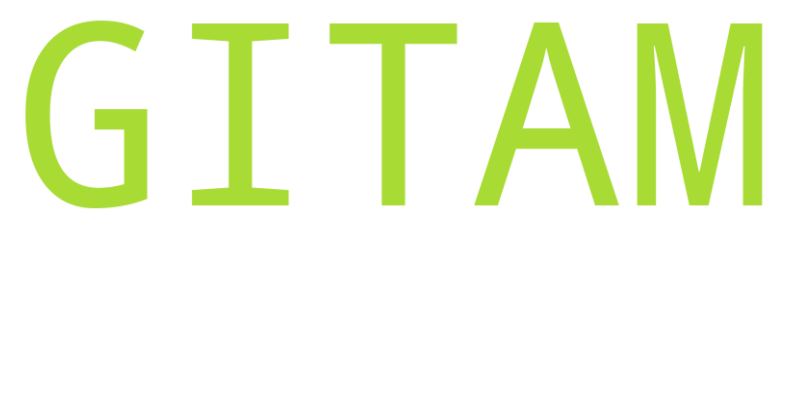

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create and display word cloud
def create_wordcloud(text):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()

# Example usage
text = input("Enter some text for the word cloud: ")
create_wordcloud(text)

# **Experiment 9**

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
def get_sentiment(sentence):
    # Create a TextBlob object
    blob = TextBlob(sentence)

    # Get polarity and subjectivity values
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    return polarity, subjectivity

# Example usage
sentence = input("Enter a sentence: ")
polarity, subjectivity = get_sentiment(sentence)

print(f"Polarity of the sentence: {polarity}")
print(f"Subjectivity of the sentence: {subjectivity}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter a sentence: Shreya is a good girl
Polarity of the sentence: 0.7
Subjectivity of the sentence: 0.6000000000000001


# **Experiment 10**

In [ ]:
#List initialization
L3=[2,4,3,6]
L4=[4.5,6.7,8.77,6.89]
L5=["HYD","CHEN","DELHI"]
L6=[1,2,3,"GUH","RRM",5.6]
L7=[L3,L4,L5,L6]
print(L3)
print(L4)
print(L5)
print(L6)
print(L7)

[2, 4, 3, 6]
[4.5, 6.7, 8.77, 6.89]
['HYD', 'CHEN', 'DELHI']
[1, 2, 3, 'GUH', 'RRM', 5.6]
[[2, 4, 3, 6], [4.5, 6.7, 8.77, 6.89], ['HYD', 'CHEN', 'DELHI'], [1, 2, 3, 'GUH', 'RRM', 5.6]]


# **Experiment 11**

In [ ]:
#listing indexing
L8=[1,3,4,"GUH","RRM",5.6,[1,2,3],66,7.8]
print(f"size of L8 is {len(L8)}")
print("size of L8 is",{len(L8)})
print(L8[3])
print(L8[6])
print(L8[7])

size of L8 is 9
size of L8 is {9}
GUH
[1, 2, 3]
66


# **Experiment 12**

In [ ]:
#List slicing
L=[11,22,33,44,55,66,33,99,4]
#1
print(L[3],L[4],L[5],L[6])
#2
print(L[2],L[5],L[4],L[3],L[6])
#3
print(L)
#5
print(L[0],L[1],L[2])
#6
print(L[6],L[7],L[8])
#7
L.reverse()
print(L[6],L[7],L[8])
#4
print(L)

44 55 66 33
33 66 55 44 33
[11, 22, 33, 44, 55, 66, 33, 99, 4]
11 22 33
33 99 4
33 22 11
[4, 99, 33, 66, 55, 44, 33, 22, 11]


# **Experiment 13**

In [ ]:
L1=list()
L2=[]
print(L1,L2)
#Add 11,22,33 to L1 and 1,2,3 to L2
L1.append(11)
L1.append(22)
L1.append(33)
print(L1)

L2.append(1)
L2.append(2)
L2.append(3)
print(L2)

#Add any two string to L1
L1=list()
L1.append("nayanika")
L1.append("Aiereddy")
print(L1)

#Add any two strings to L2
L2=list()
L2.append("psychology")
L2.append("class")
print(L2)

[] []
[11, 22, 33]
[1, 2, 3]
['nayanika', 'Aiereddy']
['psychology', 'class']


# **Experiment 14**

In [1]:
#@title Version 4: Multiple File Read
# Create test file
with open("multi.txt", "w") as f:
    f.write("4\n8\n12\n16")

try:
    with open("multi.txt", "r") as f:
        numbers = [int(line.strip()) for line in f.readlines()]
        total = sum(numbers)
        print(f"Multiple Files: {numbers}, Sum = {total}")
except:
    print("Multiple file error!")

Multiple Files: [4, 8, 12, 16], Sum = 40


# **Experiment 15**

In [ ]:

L=[11,22,33,88,44,66,33,99,4]
L.remove(33)
L.remove(88)
L.remove(99)
print(L)

[11, 22, 44, 66, 33, 4]
